## Model Test

In [3]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet18_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.300, ECE: 0.040
Optimal temperature: 4.904
After temperature - NLL: 0.866, ECE: 0.464


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5281 ± 0.0033
Final Average Prediction Set Size: 1.55 ± 0.02
Final Average Coverage: 0.9467 ± 0.0025
Final Average Real Probability: 0.9197 ± 0.0029


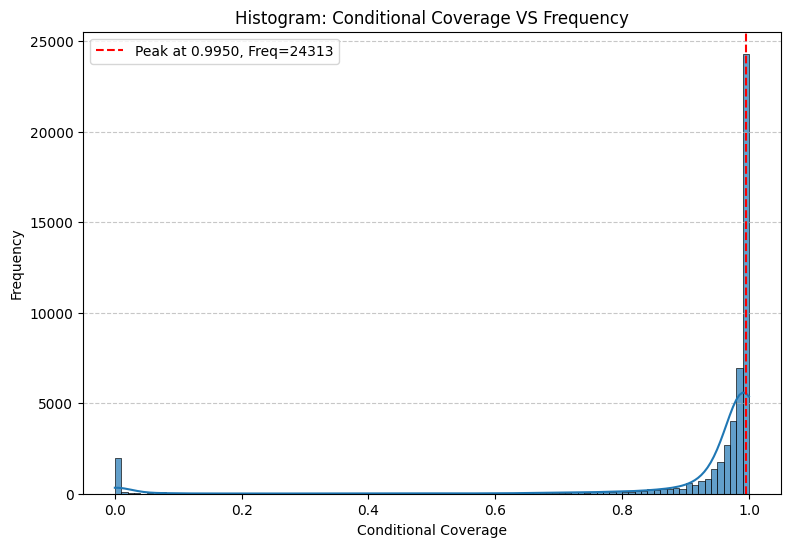

24313 (48.63%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5324 ± 0.0034
Final Average Prediction Set Size: 1.55 ± 0.02
Final Average Coverage: 0.9471 ± 0.0032
Final Average Real Probability: 0.9199 ± 0.0034


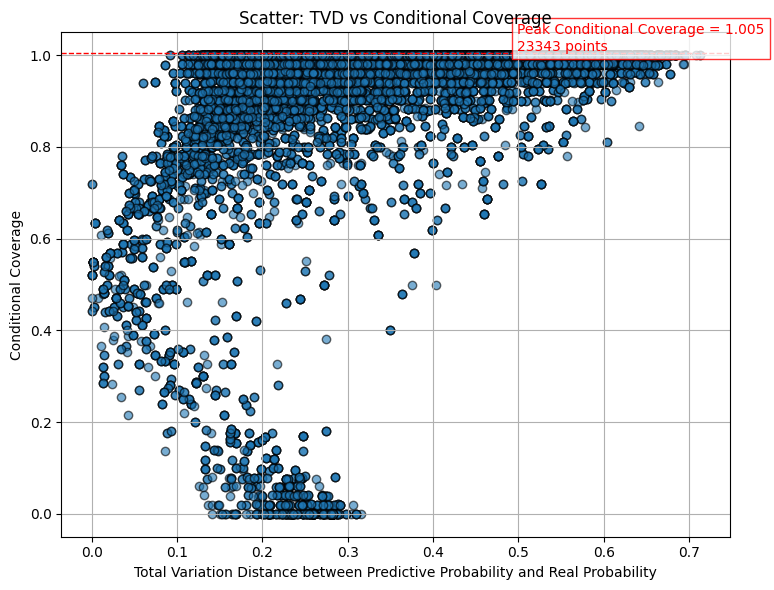

Peak Conditional Coverage = 1.005, with 23343 samples

=== Count Regions Summary ===
41422 (82.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
2132 (4.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2418 (4.8%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.65116']
  Real Probability Set      : ['0.84615']
Sample 2:
  Predictive Probability Set: ['0.64635']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.68743']
  Real Probability Set      : ['0.84615']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.35974', '0.11461', '0.10618']
  Real Probability Set      : ['0.04000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.56617']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.24302', '0.20274', '0.14068']
  Real Probability Se

In [4]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5368 ± 0.0033
Final Average Prediction Set Size: 1.47 ± 0.02
Final Average Coverage: 0.9469 ± 0.0029
Final Average Real Probability: 0.9195 ± 0.0033


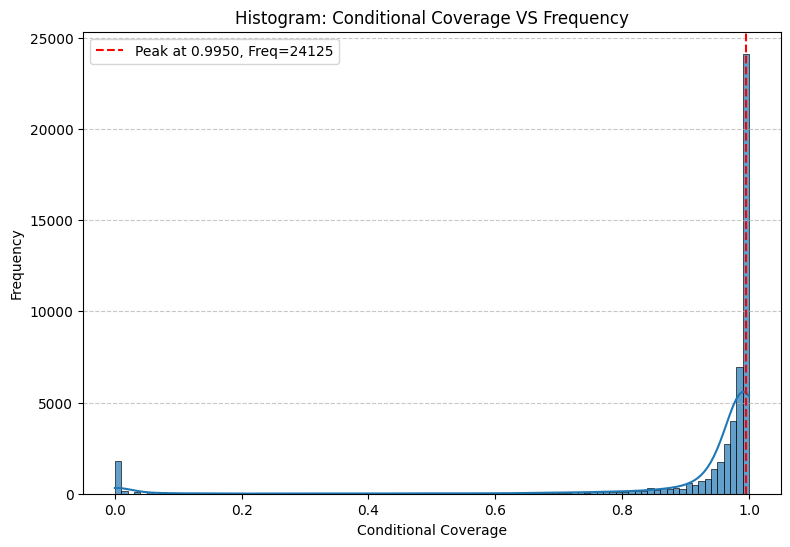

24125 (48.25%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5414 ± 0.0039
Final Average Prediction Set Size: 1.47 ± 0.02
Final Average Coverage: 0.9469 ± 0.0032
Final Average Real Probability: 0.9194 ± 0.0036


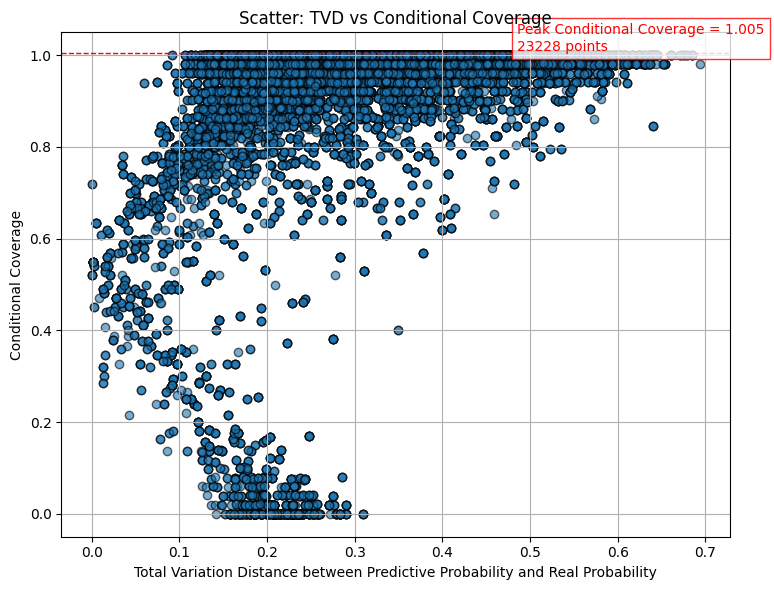

Peak Conditional Coverage = 1.005, with 23228 samples

=== Count Regions Summary ===
42377 (84.8%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
1302 (2.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2772 (5.5%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.60585']
  Real Probability Set      : ['0.80000']
Sample 2:
  Predictive Probability Set: ['0.80749']
  Real Probability Set      : ['0.97959']
Sample 3:
  Predictive Probability Set: ['0.80749']
  Real Probability Set      : ['0.97959']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56617']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.51722']
  Real Probability Set      : ['0.03922']
Sample 3:
  Predictive Probability Set: ['0.17434', '0.13563', '0.12892']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']



In [5]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1494 ± 0.1229
Final Average Prediction Set Size: 1.30 ± 0.06
Final Average Coverage: 0.9492 ± 0.0038
Final Average Real Probability: 0.9201 ± 0.0047


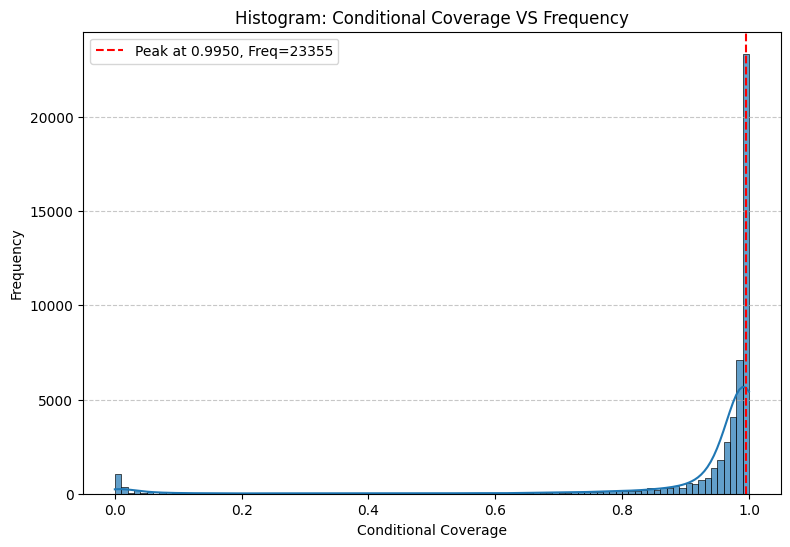

23355 (46.71%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1214 ± 0.1058
Final Average Prediction Set Size: 1.29 ± 0.05
Final Average Coverage: 0.9491 ± 0.0033
Final Average Real Probability: 0.9197 ± 0.0043


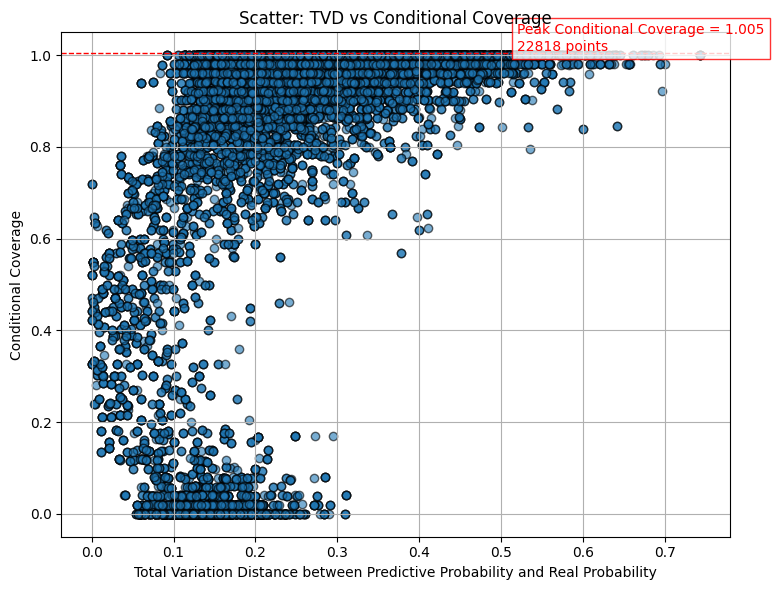

Peak Conditional Coverage = 1.005, with 22818 samples

=== Count Regions Summary ===
44079 (88.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
323 (0.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4401 (8.8%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.79142']
  Real Probability Set      : ['0.94118']
Sample 2:
  Predictive Probability Set: ['0.79142']
  Real Probability Set      : ['0.94118']
Sample 3:
  Predictive Probability Set: ['0.67857', '0.04406']
  Real Probability Set      : ['0.83333', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.39974', '0.08936']
  Real Probability Set      : ['0.07843', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.25587', '0.24893']
  Real Probability Set      : ['0.04000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.46923']
  Real Probability Set

In [6]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.05)